In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
dtypes = {
    'row_id': 'int32',
    'timestamp': 'int64',
    'user_id': 'int32',
    'content_id': 'int16',
    'content_type_id': 'int8',
    'task_container_id': 'int16',
    'user_answer': 'int8',
    'answered_correctly': 'int8',
    'prior_question_elapsed_time': 'float32',
    'prior_question_had_explanation': 'boolean'
}
train_df = pd.read_csv('train.csv', dtype = dtypes)
questions_df = pd.read_csv('questions.csv')
lectures_df = pd.read_csv('lectures.csv')


Смотрим информацию о файле

In [5]:
train_df.head()

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
0,0,0,115,5692,0,1,3,1,NaN,<NA>
1,1,56943,115,5716,0,2,2,1,37000.0,False
2,2,118363,115,128,0,0,0,1,55000.0,False
3,3,131167,115,7860,0,3,0,1,19000.0,False
4,4,137965,115,7922,0,4,1,1,11000.0,False


In [6]:
questions_df.head()

,question_id,bundle_id,correct_answer,part,tags
0,0,0,0,1,51 131 162 38
1,1,1,1,1,131 36 81
2,2,2,0,1,131 101 162 92
3,3,3,0,1,131 149 162 29
4,4,4,3,1,131 5 162 38


In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101230332 entries, 0 to 101230331
Data columns (total 10 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   row_id                          int32  
 1   timestamp                       int64  
 2   user_id                         int32  
 3   content_id                      int16  
 4   content_type_id                 int8   
 5   task_container_id               int16  
 6   user_answer                     int8   
 7   answered_correctly              int8   
 8   prior_question_elapsed_time     float32
 9   prior_question_had_explanation  boolean
dtypes: boolean(1), float32(1), int16(2), int32(2), int64(1), int8(3)
memory usage: 2.7 GB


In [8]:
train_df.shape

(101230332, 10)

Общая информация о данных:

In [10]:
train_df.isnull().sum()

row_id                                  0
timestamp                               0
user_id                                 0
content_id                              0
content_type_id                         0
task_container_id                       0
user_answer                             0
answered_correctly                      0
prior_question_elapsed_time       2351538
prior_question_had_explanation     392506
dtype: int64

In [11]:
train_df.describe()

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time
count,1.012303e+08,1.012303e+08,1.012303e+08,1.012303e+08,1.012303e+08,1.012303e+08,1.012303e+08,1.012303e+08,9.887879e+07
mean,5.061517e+07,7.703644e+09,1.076732e+09,5.219605e+03,1.935222e-02,9.040624e+02,1.376123e+00,6.251644e-01,2.542384e+04
std,2.922268e+07,1.159266e+10,6.197163e+08,3.866359e+03,1.377596e-01,1.358302e+03,1.192896e+00,5.225307e-01,2.122839e+04
min,0.000000e+00,0.000000e+00,1.150000e+02,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-1.000000e+00,0.000000e+00
25%,2.530758e+07,5.243436e+08,5.408116e+08,2.063000e+03,0.000000e+00,1.040000e+02,0.000000e+00,0.000000e+00,1.600000e+04
50%,5.061517e+07,2.674234e+09,1.071781e+09,5.026000e+03,0.000000e+00,3.820000e+02,1.000000e+00,1.000000e+00,2.100000e+04
75%,7.592275e+07,9.924551e+09,1.615742e+09,7.425000e+03,0.000000e+00,1.094000e+03,3.000000e+00,1.000000e+00,2.966600e+04
max,1.012303e+08,8.742577e+10,2.147483e+09,3.273600e+04,1.000000e+00,9.999000e+03,3.000000e+00,1.000000e+00,3.000000e+05


Анализ пользователей:

In [13]:
#количество уникальных пользователей
train_df['user_id'].nunique()

393656

In [14]:
#самые активные пользователи
user_activity = train_df['user_id'].value_counts()

In [15]:
user_activity

user_id
801103753     17917
1478712595    16914
1842816145    16851
455973631     16789
1660941992    16777
              ...  
1032404821        1
1409178561        1
1137880031        1
1777952220        1
1071441751        1
Name: count, Length: 393656, dtype: int64

In [31]:
#анализируем активность пользователей
train_df['timestamp'] = pd.to_datetime(train_df['timestamp'], unit='ms')

In [33]:
train_df.head()

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
0,0,1970-01-01 00:00:00.000,115,5692,0,1,3,1,NaN,<NA>
1,1,1970-01-01 00:00:56.943,115,5716,0,2,2,1,37000.0,False
2,2,1970-01-01 00:01:58.363,115,128,0,0,0,1,55000.0,False
3,3,1970-01-01 00:02:11.167,115,7860,0,3,0,1,19000.0,False
4,4,1970-01-01 00:02:17.965,115,7922,0,4,1,1,11000.0,False


In [34]:
train_df['time_diff'] = train_df.groupby('user_id')['timestamp'].diff()

In [35]:
#средний интервал между активностями по пользователям
user_time_diff = train_df.groupby('user_id')['time_diff'].mean().reset_index()
user_time_diff.head()

,user_id,time_diff
0,115,0 days 04:07:26.445400
1,124,0 days 00:00:19.700793103
2,2746,0 days 00:00:43.971421052
3,5382,0 days 04:35:47.649259842
4,8623,0 days 02:09:28.817441441


In [47]:
#считаем активных и неактивных пользователей
active_threshold = pd.to_timedelta(604800, unit='s')  # 1 неделя
train_df['time_diff'] = pd.to_timedelta(train_df['time_diff'], unit='s')
train_df['active_user'] = train_df.groupby('user_id')['time_diff'].transform(lambda x: 'active' if x.mean ()< active_threshold else 'inactive')
train_df[['user_id', 'time_diff', 'active_user']].head()

,user_id,time_diff,active_user
0,115,NaT,active
1,115,0 days 00:00:56.943000,active
2,115,0 days 00:01:01.420000,active
3,115,0 days 00:00:12.804000,active
4,115,0 days 00:00:06.798000,active


In [48]:
train_df['active_user'].value_counts()

active_user
active      101038104
inactive       192228
Name: count, dtype: int64

Сколько времени пользователи тратят в среднем на лекции и вопросы:

In [50]:
content_type_time_diff = train_df.groupby('content_type_id')['time_diff'].mean()
content_type_time_diff.head()

content_type_id
0   0 days 05:32:04.036807027
1   0 days 07:30:17.022161047
Name: time_diff, dtype: timedelta64[ns]

Топ 3 пользователя, давших наибольшее количество правильных ответов:

In [52]:
only_questions = train_df[train_df['content_type_id'] == 0]
users_answered_correctly = only_questions[only_questions['answered_correctly'] == 1]
correct_answers_per_user = users_answered_correctly.groupby('user_id').size()
top_3_users = correct_answers_per_user.nlargest(3).index

In [53]:
top_3_users

Index([2139561972, 1615528747, 338684437], dtype='int32', name='user_id')

Добавим метаданные вопросов в таблицу train_df

In [10]:
#Оставляем только вопросы в train_df
train_questions = train_df[train_df['content_type_id'] == 0]

#Соединение с метаданными вопросов
merged_questions = pd.merge(train_questions, questions_df, left_on='content_id', right_on='question_id', how='left')


In [12]:
merged_questions.head()

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,question_id,bundle_id,correct_answer,part,tags
0,0,0,115,5692,0,1,3,1,NaN,<NA>,5692,5692,3,5,151
1,1,56943,115,5716,0,2,2,1,37000.0,False,5716,5716,2,5,168
2,2,118363,115,128,0,0,0,1,55000.0,False,128,128,0,1,131 149 92
3,3,131167,115,7860,0,3,0,1,19000.0,False,7860,7860,0,1,131 104 81
4,4,137965,115,7922,0,4,1,1,11000.0,False,7922,7922,1,1,131 149 92


Визуализация метрик:

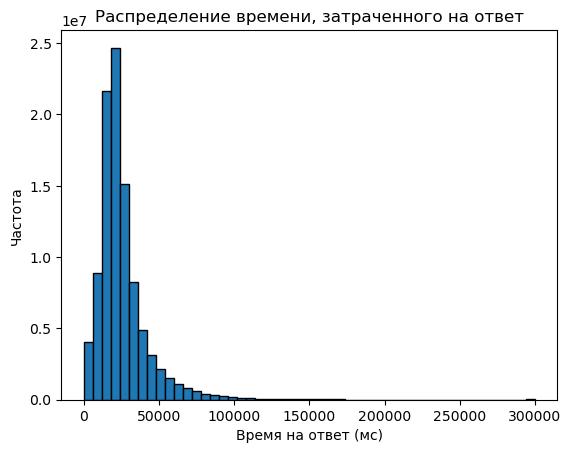

In [14]:
#Гистограмма времени затраченного на ответ

plt.hist(train_df['prior_question_elapsed_time'].dropna(), bins=50, edgecolor='black')
plt.title('Распределение времени, затраченного на ответ')
plt.xlabel('Время на ответ (мс)')
plt.ylabel('Частота')
plt.show()

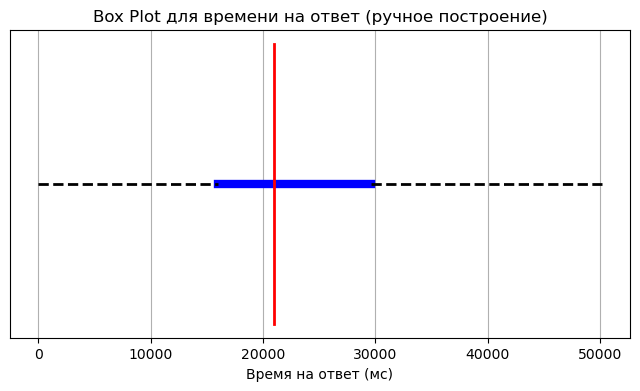

In [23]:
#Box plot для времени затраченного на ответ (без выбросов)

#вычисляем предварительно медиану и квантили
median = train_df['prior_question_elapsed_time'].median()
q1 = train_df['prior_question_elapsed_time'].quantile(0.25)
q3 = train_df['prior_question_elapsed_time'].quantile(0.75)
iqr = q3 - q1

# Усы
lower_whisker = max(train_df['prior_question_elapsed_time'].min(), q1 - 1.5 * iqr)
upper_whisker = min(train_df['prior_question_elapsed_time'].max(), q3 + 1.5 * iqr)

plt.figure(figsize=(8, 4))

plt.plot([q1, q3], [1, 1], color='blue', linewidth=6)  # q1 - q3
plt.plot([median, median], [0.99, 1.01], color='red', linewidth=2)  # Медиана

# Построение усов
plt.plot([lower_whisker, q1], [1, 1], color='black', linestyle='--', linewidth=2)  
plt.plot([q3, upper_whisker], [1, 1], color='black', linestyle='--', linewidth=2)  

# Настройка осей и заголовков
plt.title('Box Plot для времени на ответ (ручное построение)')
plt.xlabel('Время на ответ (мс)')
plt.yticks([])
plt.grid(True)

plt.show()